In [49]:
import pandas as pd 
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import statistics as s

plt.style.use('ggplot')
%matplotlib inline

# Bi-Variate Linear REgression

Bi-Variate Regression ::: When dataset has two variables whose relationships are being compared.

EXAMPLE PROBLEM:
30 homes with 6 variables
Focus on price sqft lot size and baths

* Price is the dependant(prediction) or response/outcome variable when using sqft to predict
* SqFt is the indepdenant or predictor variable when trying to predict price

## Independant Variable = X axis

## Dependant Variable = Y axis

### Defining a line
    Y = M(x)+ B
    where y : Dependant Variable
    M = slope
    B = y-intercept
    R^2 = 

In [ ]:
# df = pd.read_csv(data)
# # Count nulls
# df.isnull().sum()
# # # Drop nulls
# # df = df.dropna()
# # # Check Data:describe();shape();keys();index();info();dtypes()
# df.info() # isnull() works I prefer info()
# x=df['SqFt']
# y=df['Price']
# print(x.corr(y,method='pearson'))
# print(y.corr(x,method='pearson'))

In [47]:
# data=Path('Home Prices Data.csv')
# x=np.array([5,3,6,3,4,4,6,8])
# y=np.array([15,13,9,2,23,11,9,5])
# x=np.array([5,3,6,3,4,4,6,8])
# y=np.array([13,15,7,12,13,11,9,5])
# x=np.array([14,12,20,16,46,23,48,50,55,50])
# y=np.array([24,14,28,30,80,30,90,85,120,110])
# x=np.array([14,12,20,16,46,23,48,50,55,50])
# y=np.array([24,14,28,30,80,30,90,85,120,110])
# x=np.array([5,3,6,3,4,4,6,8])
# y=np.array([15,13,9,2,23,11,9,5])


In [50]:
x=np.array([14,23,48,50,55,50])
y=np.array([24,30,90,85,120,110])

independant='x'
dependant='y'

<AxesSubplot:>

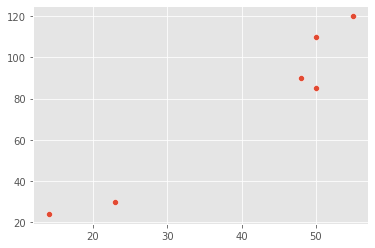

In [46]:
sns.scatterplot(x=x,y=y)

In [48]:
print(np.corrcoef(x,y))

[[1.         0.96687022]
 [0.96687022 1.        ]]


In [27]:
# result = scipy.stats.linregress(x, y)
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y, alternative='two-sided')
r2= r*r
line = f'Rline: y={intercept:.3f}+{slope:.3f}x,r={r:.3f}, r^2={r2:.3f}'

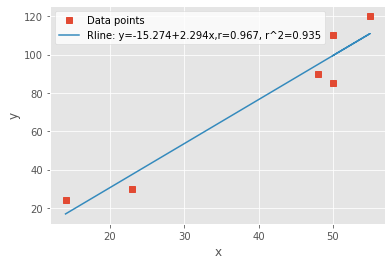

In [28]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel(independant)
ax.set_ylabel(dependant)
ax.legend(facecolor='white')
plt.show()

In [37]:
# when x is blank what is y:---->>>>>
problem_value=20
solution=intercept+(slope*problem_value)
print(solution)
print('')
print((round(solution,1)),'!!!!---->>>> Rounded to the Nearest whole Digit')

30.61279229711141

30.6 !!!!---->>>> Rounded to the Nearest whole Digit



* r^2 = variation interpreted as a percentage of data explained in price
* r value = correlation between sqft & price 
* Correlation is bound by -1 and +1
* if positive slope = postive correlation 


In [ ]:
Xbar=s.mean(x)
Ybar=s.mean(y)
Xvar=s.variance(x)
Yvar=s.variance(y)
Xdev=s.stdev(x)
Ydev=s.stdev(y)

In [41]:
print(f'Mean of X or Xbar ={Xbar}')
print(f'Mean of X or Xbar ={Ybar}')
print('')
print(f'Variance of X = {Xvar}')
print(f'Variance of Y = {Yvar}')
print('')
print(f'Standard Deviation of X = {Xdev}')
print(f'Standard Deviation of Y = {Ydev}')
print('')
print('VARIANCE   |   COVARIANCE')
print('COVARIANCE |   VARIANCE')
print(np.cov(x,y))
print('')
print('CORRELLATION COEFICIENT')
print(np.corrcoef(x,y))

Mean of X or Xbar =40
Mean of X or Xbar =76

Variance of X = 290
Variance of Y = 1637

Standard Deviation of X = 17.029386365926403
Standard Deviation of Y = 40.45985664828782

VARIANCE   |   COVARIANCE
COVARIANCE |   VARIANCE
[[ 290.8  667.2]
 [ 667.2 1637.5]]

CORRELLATION COEFICIENT
[[1.         0.96687022]
 [0.96687022 1.        ]]


Estimated coefficients:
b_0 = -15.274415405777162            
b_1 = 2.294360385144429


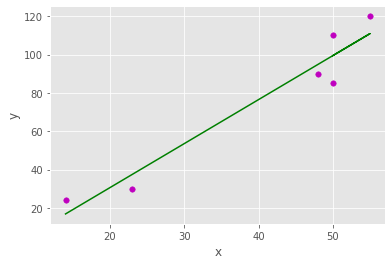

In [31]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)  
    
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data

  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()